In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
pd.options.plotting.backend = "plotly"
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C://Users/itzha/Downloads/New folder/Autism-Child-Data.csv")
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,f,White-European,yes,yes,'United Kingdom',no,10,'4-11 years',Parent,YES
288,1,0,0,0,1,0,1,0,0,1,7.0,f,White-European,yes,yes,Australia,no,4,'4-11 years',Parent,NO
289,1,0,1,1,1,1,1,0,0,1,4.0,m,Latino,no,no,Brazil,no,7,'4-11 years',Parent,YES
290,1,1,1,0,1,1,1,1,1,1,4.0,m,'South Asian',no,no,India,no,9,'4-11 years',Parent,YES


In [3]:
print(f'Shape of dataframe is: {df.shape}')

Shape of dataframe is: (292, 21)


In [4]:
pd.DataFrame(df.dtypes,
             columns = ["Data Type"])

,Data Type
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


In [5]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [6]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [7]:
print(f"Maximum age is data: {df['age'].max()}\n")

print(f"Minimum age is data: {df['age'].min()}")

Maximum age is data: 11.0

Minimum age is data: 4.0


In [8]:
np.mean(df['age'])

6.354166666666667

In [9]:
df['age']= df['age'].replace(np.nan, 6)
df['age'].unique()

array([ 6.,  5.,  4., 11., 10.,  8.,  7.,  9.])

In [10]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [11]:
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

-------------------------------
Column name: gender

Unique values:
['m' 'f']


-------------------------------
Column name: ethnicity

Unique values:
['Others' "'Middle Eastern '" '?' 'White-European' 'Black' "'South Asian'"
 'Asian' 'Pasifika' 'Hispanic' 'Turkish' 'Latino']


-------------------------------
Column name: jundice

Unique values:
['no' 'yes']


-------------------------------
Column name: austim

Unique values:
['no' 'yes']


-------------------------------
Column name: contry_of_res

Unique values:
['Jordan' "'United States'" 'Egypt' "'United Kingdom'" 'Bahrain' 'Austria'
 'Kuwait' "'United Arab Emirates'" 'Europe' 'Malta' 'Bulgaria'
 "'South Africa'" 'India' 'Afghanistan' 'Georgia' "'New Zealand'" 'Syria'
 'Iraq' 'Australia' "'Saudi Arabia'" 'Armenia' 'Turkey' 'Pakistan'
 'Canada' 'Oman' 'Brazil' "'South Korea'" "'Costa Rica'" 'Sweden'
 'Philippines' 'Malaysia' 'Argentina' 'Japan' 'Bangladesh' 'Qatar'
 'Ireland' 'Romania' 'Netherlands' 'Lebanon' 'Germany' 'Latvia' 'Ru

In [12]:
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')

In [13]:
df['ethnicity'].unique()

array(['Others', "'Middle Eastern '", 'White-European', 'Black',
       "'South Asian'", 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino'], dtype=object)

In [14]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])

In [15]:
df['relation'].unique()

array(['Parent', 'Self', 'Relative', "'Health care professional'", 'self'],
      dtype=object)

In [16]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,Others,no,no,Jordan,yes,5,'4-11 years',Parent,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,Others,yes,no,Jordan,no,4,'4-11 years',Parent,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [18]:
df['age_desc'] = le.fit_transform(df['age_desc'])

In [19]:
df['gender'].unique()

array(['m', 'f'], dtype=object)

In [20]:
df['gender']= df['gender'].apply(lambda x: 1 if x == 'm' else (0 if x == 'f' else None))

In [21]:
df['jundice'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
df['jundice']= df['jundice'].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))

In [23]:
df['austim'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df['austim']= df['austim'].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))

In [25]:
df['contry_of_res'].unique()

array(['Jordan', "'United States'", 'Egypt', "'United Kingdom'",
       'Bahrain', 'Austria', 'Kuwait', "'United Arab Emirates'", 'Europe',
       'Malta', 'Bulgaria', "'South Africa'", 'India', 'Afghanistan',
       'Georgia', "'New Zealand'", 'Syria', 'Iraq', 'Australia',
       "'Saudi Arabia'", 'Armenia', 'Turkey', 'Pakistan', 'Canada',
       'Oman', 'Brazil', "'South Korea'", "'Costa Rica'", 'Sweden',
       'Philippines', 'Malaysia', 'Argentina', 'Japan', 'Bangladesh',
       'Qatar', 'Ireland', 'Romania', 'Netherlands', 'Lebanon', 'Germany',
       'Latvia', 'Russia', 'Italy', 'China', 'Nigeria',
       "'U.S. Outlying Islands'", 'Nepal', 'Mexico', "'Isle of Man'",
       'Libya', 'Ghana', 'Bhutan'], dtype=object)

In [26]:
df['contry_of_res'] = le.fit_transform(df['contry_of_res'])

In [27]:
df['used_app_before'] = le.fit_transform(df['used_app_before'])

In [28]:
df['relation'] = le.fit_transform(df['relation'])

In [29]:
df['ethnicity'] = le.fit_transform(df['ethnicity'])

In [30]:
df['relation'] = le.fit_transform(df['relation'])

In [31]:
df['Class/ASD'].unique()

array(['NO', 'YES'], dtype=object)

In [32]:
df['Class/ASD']= df['Class/ASD'].apply(lambda x: 1 if x == 'YES' else (0 if x == 'NO' else None))

In [33]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,1,6,0,0,32,0,5,0,1,0
1,1,1,0,0,1,1,0,1,0,0,6.0,1,0,0,0,32,0,5,0,1,0
2,1,1,0,0,0,1,1,1,0,0,6.0,1,6,0,0,32,1,5,0,1,0
3,0,1,0,0,1,1,0,0,0,1,5.0,0,6,1,0,32,0,4,0,1,0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,6,1,0,9,0,10,0,1,1


In [34]:
#feature selection
X = df.drop('Class/ASD',axis=1)
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,0,0,1,1,0,1,0,0,6.0,1,6,0,0,32,0,5,0,1
1,1,1,0,0,1,1,0,1,0,0,6.0,1,0,0,0,32,0,5,0,1
2,1,1,0,0,0,1,1,1,0,0,6.0,1,6,0,0,32,1,5,0,1
3,0,1,0,0,1,1,0,0,0,1,5.0,0,6,1,0,32,0,4,0,1
4,1,1,1,1,1,1,1,1,1,1,5.0,1,6,1,0,9,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,0,9,1,1,8,0,10,0,1
288,1,0,0,0,1,0,1,0,0,1,7.0,0,9,1,1,13,0,4,0,1
289,1,0,1,1,1,1,1,0,0,1,4.0,1,5,0,0,18,0,7,0,1
290,1,1,1,0,1,1,1,1,1,1,4.0,1,1,0,0,27,0,9,0,1


In [35]:
y = df['Class/ASD']
y

0      0
1      0
2      0
3      0
4      1
      ..
287    1
288    0
289    1
290    1
291    0
Name: Class/ASD, Length: 292, dtype: int64

In [36]:
from sklearn.feature_selection import SelectKBest

In [37]:
from sklearn.feature_selection import chi2

In [38]:
FIT_FEATURES = SelectKBest(score_func=chi2)

In [39]:
FIT_FEATURES.fit(X,y)

SelectKBest(score_func=<function chi2 at 0x0000025D9FB1C8B0>)

In [40]:
SCORE_COL = pd.DataFrame(FIT_FEATURES.scores_,columns =['score value'])

In [41]:
NAME_COL = pd.DataFrame(X.columns)

In [42]:
topr_features = pd.concat([NAME_COL,SCORE_COL],axis=1)

In [43]:
topr_features.columns=['Top Features', 'Score']

In [44]:
topr_features

,Top Features,Score
0,A1_Score,16.570951
1,A2_Score,7.134778
2,A3_Score,11.734209
3,A4_Score,42.338541
4,A5_Score,10.821959
5,A6_Score,14.625696
6,A7_Score,8.630529
7,A8_Score,28.251186
8,A9_Score,34.980461
9,A10_Score,15.483910


In [45]:
topr_features.nlargest(16,'Score')

,Top Features,Score
17,result,170.110548
3,A4_Score,42.338541
8,A9_Score,34.980461
15,contry_of_res,31.738550
7,A8_Score,28.251186
0,A1_Score,16.570951
9,A10_Score,15.483910
5,A6_Score,14.625696
2,A3_Score,11.734209
4,A5_Score,10.821959


In [46]:
#drop multiple columns by name
df.drop(['contry_of_res', 'relation', 'age_desc', 'used_app_before'], axis=1, inplace=True)

In [47]:
X = df.drop('Class/ASD',axis=1)

In [48]:
y = df['Class/ASD']

In [49]:
print(X.shape, y.shape)

(292, 16) (292,)


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 10)

In [51]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [52]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
prob_model=model.predict_proba(X_test) [:,1]
print(y_pred)

[0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0]


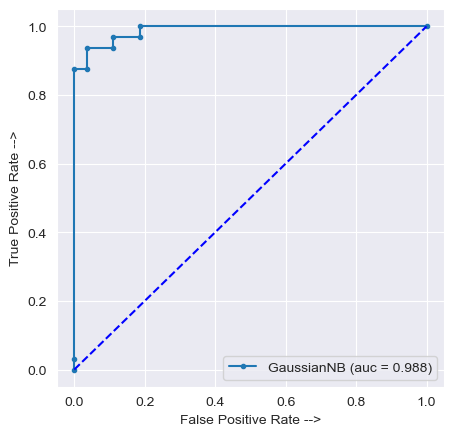

In [53]:

from sklearn.metrics import roc_curve, auc
GaussianNB_fpr, GaussianNB_tpr, threshold = roc_curve(y_test, prob_model)
auc_GaussianNB = auc(GaussianNB_fpr, GaussianNB_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(GaussianNB_fpr, GaussianNB_tpr, marker='.', label='GaussianNB (auc = %0.3f)' % auc_GaussianNB)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
CM=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,y_pred)
print("Performance:\n",CR)

Confusion Matrix:
 [[27  0]
 [ 4 28]]
Performance:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        27
           1       1.00      0.88      0.93        32

    accuracy                           0.93        59
   macro avg       0.94      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59



In [55]:
from sklearn.naive_bayes import BernoulliNB
BNG = BernoulliNB()
BNG.fit(X_train,y_train)
BNG_pred = BNG.predict(X_test)
prob_BNG=BNG.predict_proba(X_test) [:,1]
BNG.score(X_test,y_test)

0.9322033898305084

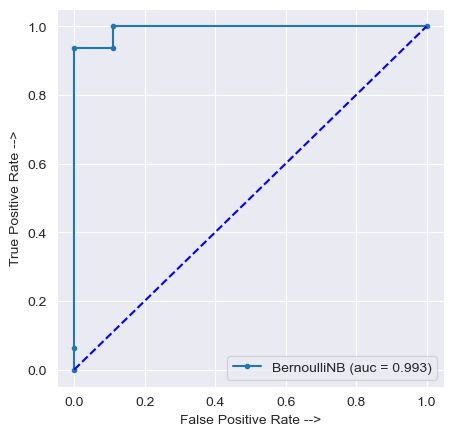

In [56]:
from sklearn.metrics import roc_curve, auc
BernoulliNB_fpr, BernoulliNB_tpr, threshold = roc_curve(y_test, prob_BNG)
auc_BernoulliNB = auc(BernoulliNB_fpr, BernoulliNB_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(BernoulliNB_fpr, BernoulliNB_tpr, marker='.', label='BernoulliNB (auc = %0.3f)' % auc_BernoulliNB)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [57]:
CM=confusion_matrix(y_test,BNG_pred)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,BNG_pred)
print("Performance:\n",CR)

Confusion Matrix:
 [[25  2]
 [ 2 30]]
Performance:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        32

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [58]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
MNB_pred = MNB.predict(X_test)
prob_MNB=MNB.predict_proba(X_test) [:,1]
MNB.score(X_test,y_test)

0.7796610169491526

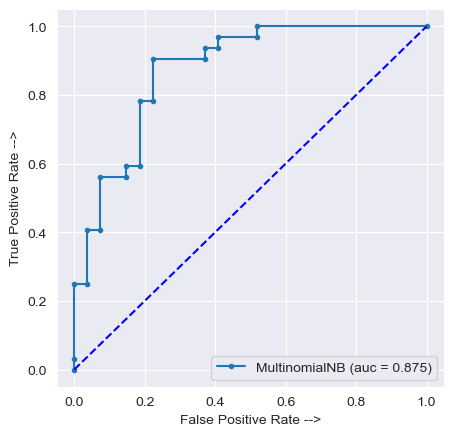

In [59]:
from sklearn.metrics import roc_curve, auc
MultinomialNB_fpr, MultinomialNB_tpr, threshold = roc_curve(y_test, prob_MNB)
auc_MultinomialNB = auc(MultinomialNB_fpr, MultinomialNB_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(MultinomialNB_fpr, MultinomialNB_tpr, marker='.', label='MultinomialNB (auc = %0.3f)' % auc_MultinomialNB)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [60]:
CM=confusion_matrix(y_test,MNB_pred)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,MNB_pred)
print("Performance:\n",CR)

Confusion Matrix:
 [[21  6]
 [ 7 25]]
Performance:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.81      0.78      0.79        32

    accuracy                           0.78        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.78      0.78      0.78        59



In [61]:
from sklearn.svm import SVC
SVM_rbf= SVC(kernel='rbf', random_state=10,gamma=3.0,C=1.5)
SVM_classifier=SVM_rbf.fit(X_train,y_train)
SVM_prediction=SVM_classifier.predict(X_test)
SVM_predictions=SVM_classifier.decision_function(X_test)

In [62]:
CM=confusion_matrix(y_test,SVM_prediction)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,SVM_prediction)
print("Performance:\n",CR)

Confusion Matrix:
 [[27  0]
 [28  4]]
Performance:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66        27
           1       1.00      0.12      0.22        32

    accuracy                           0.53        59
   macro avg       0.75      0.56      0.44        59
weighted avg       0.77      0.53      0.42        59



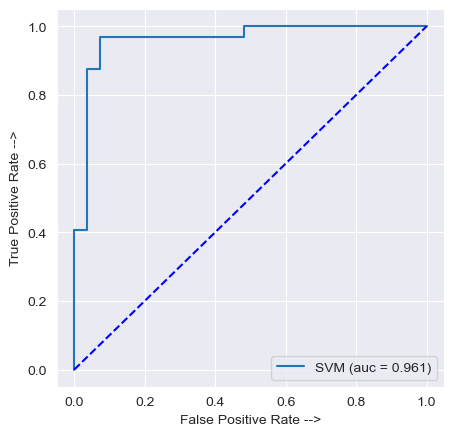

In [63]:
from sklearn.metrics import roc_curve, auc
svm_fpr, svm_tpr, threshold = roc_curve(y_test, SVM_predictions)
auc_svm = auc(svm_fpr, svm_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
Rfc = RandomForestClassifier()
Rfc.fit(X_train,y_train)
Rfc_predict = Rfc.predict(X_test)
Rfc.score(X_test,y_test)
prob_Rfc=Rfc.predict_proba(X_test) [:,1]

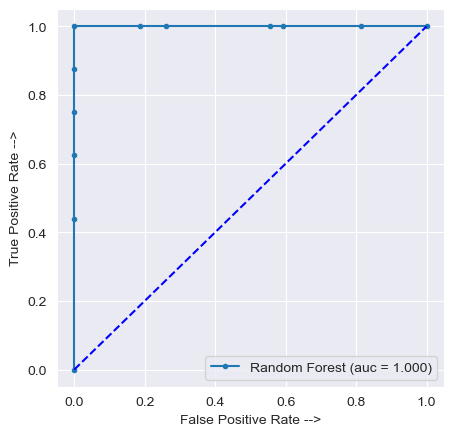

In [66]:
from sklearn.metrics import roc_curve, auc
RandomForest_fpr, RandomForest_tpr, threshold = roc_curve(y_test, prob_Rfc)
auc_RandomForest = auc(RandomForest_fpr, RandomForest_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(RandomForest_fpr, RandomForest_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_RandomForest)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [67]:
CM=confusion_matrix(y_test,Rfc_predict)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,Rfc_predict)
print("Performance:\n",CR)

Confusion Matrix:
 [[27  0]
 [ 0 32]]
Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        32

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada.fit(X_train, y_train)
ada.predict(X_test)
prob_ADB=ada.predict_proba(X_test) [:,1]
ada.score(X_test,y_test)

1.0

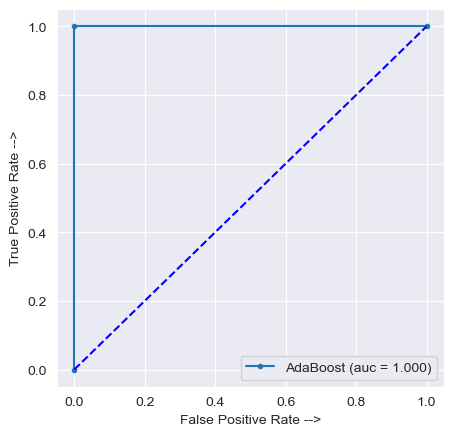

In [69]:
from sklearn.metrics import roc_curve, auc
AdaBoost_fpr, AdaBoost_tpr, threshold = roc_curve(y_test, prob_ADB)
auc_AdaBoost = auc(AdaBoost_fpr, AdaBoost_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(AdaBoost_fpr, AdaBoost_tpr, marker='.', label='AdaBoost (auc = %0.3f)' % auc_AdaBoost)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression() 
LR.fit(X_train,y_train)
LR_predict = LR.predict(X_test)
LR.score(X_test,y_test)

0.6815710875887986

In [71]:
from sklearn.metrics import mean_squared_error,r2_score

In [72]:
mean_squared_error(y_test,LR_predict)

0.07903550138560127

In [73]:
r2_score(y_test,LR_predict)

0.6815710875887986

In [74]:
from sklearn.linear_model import LogisticRegression 
Reg = LogisticRegression()
Reg.fit(X_train,y_train)
Reg_predict =Reg.predict(X_test)
probs_lr = Reg.decision_function(X_test)

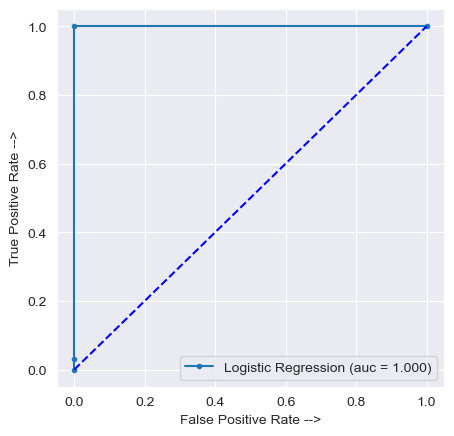

In [75]:
from sklearn.metrics import roc_curve, auc

logisticRegression_fpr, logisticRegression_tpr, threshold = roc_curve(y_test, probs_lr)
auc_logisticRegression = auc(logisticRegression_fpr, logisticRegression_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logisticRegression_fpr, logisticRegression_tpr, marker='.', label='Logistic Regression (auc = %0.3f)' % auc_logisticRegression)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [76]:
CM=confusion_matrix(y_test,Reg_predict)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,Reg_predict)
print("Performance:\n",CR)

Confusion Matrix:
 [[27  0]
 [ 0 32]]
Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        32

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [77]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_predict = tree.predict(X_test)
prob_tree= tree.predict_proba(X_test) [:,1]
tree.score(X_test,y_test)

1.0

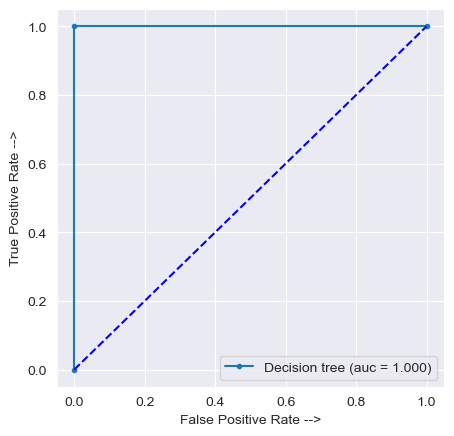

In [78]:
from sklearn.metrics import roc_curve, auc
tree_fpr,tree_tpr, threshold = roc_curve(y_test, prob_tree)
auc_tree = auc(tree_fpr, tree_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision tree (auc = %0.3f)' % auc_tree)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [79]:
CM=confusion_matrix(y_test,tree_predict)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,tree_predict)
print("Performance:\n",CR)

Confusion Matrix:
 [[27  0]
 [ 0 32]]
Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        32

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [80]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(X_train,y_train)
xb_pred = xb.predict(X_test)
prob_xb= xb.predict_proba(X_test) [:,1]
xb.score(X_test,y_test)

[15:39:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

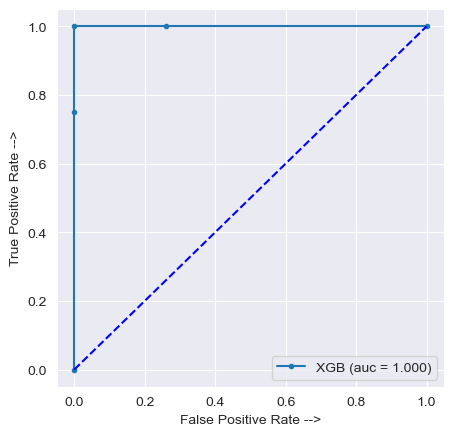

In [81]:
from sklearn.metrics import roc_curve, auc
xb_fpr,xb_tpr, threshold = roc_curve(y_test, prob_xb)
auc_xb = auc(xb_fpr, xb_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xb_fpr, xb_tpr, marker='.', label='XGB (auc = %0.3f)' % auc_xb)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [82]:
CM=confusion_matrix(y_test,xb_pred)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,xb_pred)
print("Performance:\n",CR)

Confusion Matrix:
 [[27  0]
 [ 0 32]]
Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        32

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [83]:
from sklearn.neighbors import KNeighborsRegressor
kn= KNeighborsRegressor(n_neighbors =20) 
kn.fit (X_train,y_train)
kn_predict= kn.predict(X_test)
kn.score(X_test,y_test)

0.8284288194444445

In [84]:
mean_squared_error(y_test,kn_predict)

0.04258474576271187

In [85]:
r2_score(y_test,kn_predict)

0.8284288194444445

In [86]:
from sklearn.linear_model import SGDClassifier
SGD =  SGDClassifier(loss="hinge", penalty="l2", random_state=10)
SGD.fit(X_train,y_train)
SGD_pred = xb.predict(X_test)
SGD.score(X_test,y_test)

1.0

In [87]:
CM=confusion_matrix(y_test,SGD_pred)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,SGD_pred)
print("Performance:\n",CR)

Confusion Matrix:
 [[27  0]
 [ 0 32]]
Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        32

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [88]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
QDA_pred = QDA.predict(X_test)
prob_QDA=QDA.predict_proba(X_test) [:,1]
QDA.score(X_test,y_test)

0.7627118644067796

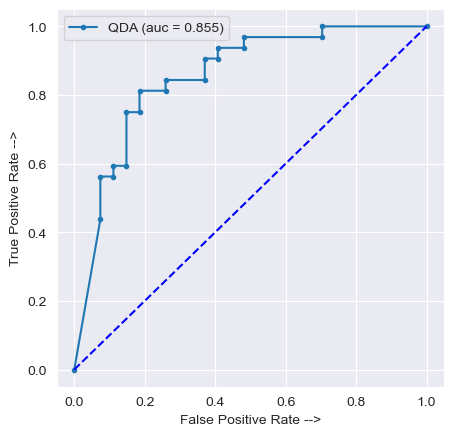

In [89]:
from sklearn.metrics import roc_curve, auc
QDA_fpr, QDA_tpr, threshold = roc_curve(y_test,prob_QDA)
auc_QDA = auc(QDA_fpr, QDA_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(QDA_fpr, QDA_tpr, marker='.', label='QDA (auc = %0.3f)' % auc_QDA)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [90]:
CM=confusion_matrix(y_test,QDA_pred)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,QDA_pred)
print("Performance:\n",CR)

Confusion Matrix:
 [[15 12]
 [ 2 30]]
Performance:
               precision    recall  f1-score   support

           0       0.88      0.56      0.68        27
           1       0.71      0.94      0.81        32

    accuracy                           0.76        59
   macro avg       0.80      0.75      0.75        59
weighted avg       0.79      0.76      0.75        59



In [91]:
from sklearn import metrics
CM = metrics.confusion_matrix(y_test,QDA_pred)
accuracy = metrics.accuracy_score(y_test,QDA_pred)
precision = metrics.precision_score(y_test,QDA_pred)
recall = metrics.recall_score(y_test,QDA_pred)
f_score = metrics.f1_score(y_test,QDA_pred)
print("Confusion:",CM)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_score)

Confusion: [[15 12]
 [ 2 30]]
Accuracy: 0.7627118644067796
Precision: 0.7142857142857143
Recall: 0.9375
F-measure: 0.8108108108108109


In [92]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(n_estimators=10, min_samples_split=2,random_state=1)
ETC.fit(X_train,y_train)
ETC_pred = xb.predict(X_test)
ETC.score(X_test,y_test)
prob_ETC= ETC.predict_proba(X_test) [:,1]

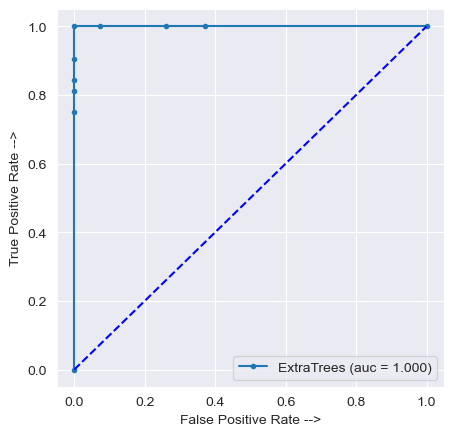

In [93]:
from sklearn.metrics import roc_curve, auc
ExtraTrees_fpr, ExtraTrees_tpr, threshold = roc_curve(y_test, prob_ETC)
auc_ExtraTrees = auc(ExtraTrees_fpr, ExtraTrees_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(ExtraTrees_fpr, ExtraTrees_tpr, marker='.', label='ExtraTrees (auc = %0.3f)' % auc_ExtraTrees)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [94]:
CM=confusion_matrix(y_test,ETC_pred)
print("Confusion Matrix:\n",CM)
CR=classification_report(y_test,ETC_pred)
print("Performance:\n",CR)

Confusion Matrix:
 [[27  0]
 [ 0 32]]
Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        32

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [95]:
#cathboost
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100,depth=10,random_state=42,auto_class_weights='Balanced')
cb.fit(X_train,y_train)
cb_pred=cb.predict(X_test)
cb.score(X_test,y_test)
prob_cb= cb.predict_proba(X_test) [:,1]

Learning rate set to 0.045687
0:	learn: 0.6807520	total: 145ms	remaining: 14.3s
1:	learn: 0.6655767	total: 158ms	remaining: 7.72s
2:	learn: 0.6552164	total: 168ms	remaining: 5.42s
3:	learn: 0.6288025	total: 168ms	remaining: 4.04s
4:	learn: 0.6107675	total: 171ms	remaining: 3.26s
5:	learn: 0.5966253	total: 176ms	remaining: 2.76s
6:	learn: 0.5759741	total: 179ms	remaining: 2.37s
7:	learn: 0.5685089	total: 188ms	remaining: 2.16s
8:	learn: 0.5495246	total: 191ms	remaining: 1.93s
9:	learn: 0.5400077	total: 201ms	remaining: 1.81s
10:	learn: 0.5225558	total: 203ms	remaining: 1.65s
11:	learn: 0.5155381	total: 214ms	remaining: 1.57s
12:	learn: 0.5019718	total: 217ms	remaining: 1.45s
13:	learn: 0.4967162	total: 229ms	remaining: 1.41s
14:	learn: 0.4782549	total: 231ms	remaining: 1.31s
15:	learn: 0.4535031	total: 232ms	remaining: 1.22s
16:	learn: 0.4372645	total: 233ms	remaining: 1.14s
17:	learn: 0.4295383	total: 239ms	remaining: 1.09s
18:	learn: 0.4168578	total: 242ms	remaining: 1.03s
19:	learn: 

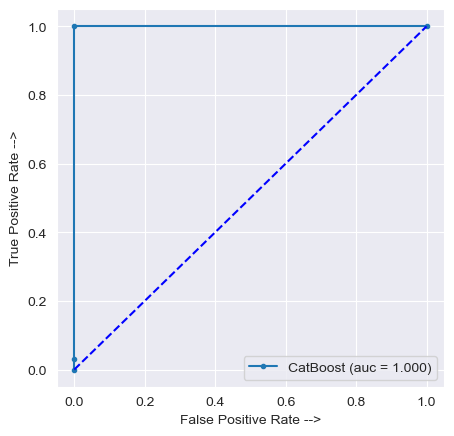

In [96]:
from sklearn.metrics import roc_curve, auc
CathB_fpr,CathB_tpr, threshold = roc_curve(y_test, prob_cb)
auc_CathB = auc(CathB_fpr, CathB_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(CathB_fpr, CathB_tpr, marker='.', label='CatBoost (auc = %0.3f)' % auc_CathB)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()